In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import scipy.stats as sts
import sympy as sp
from statsmodels.discrete.discrete_model import Logit, Probit

In [2]:
df = pd.read_csv('wine_quality_winequality.csv', sep=';')
df['quality'] = (df['quality']>5).astype(np.int64)
#df['intercept'] = 1
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


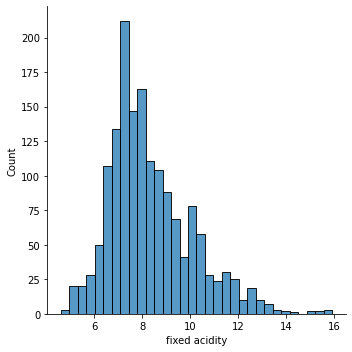

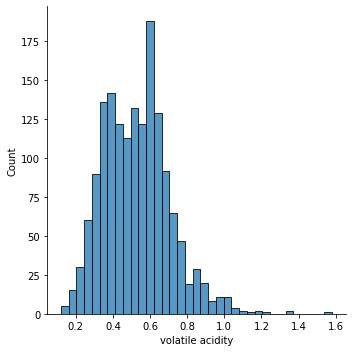

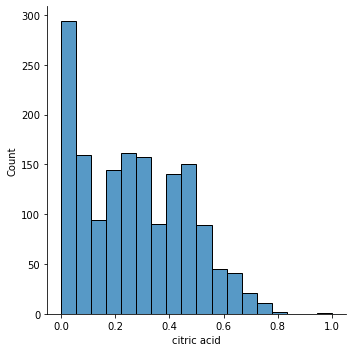

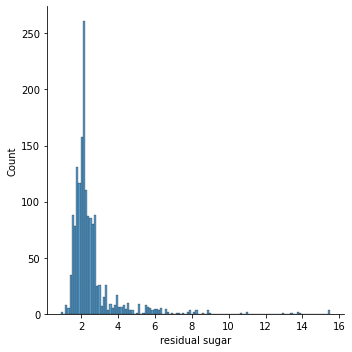

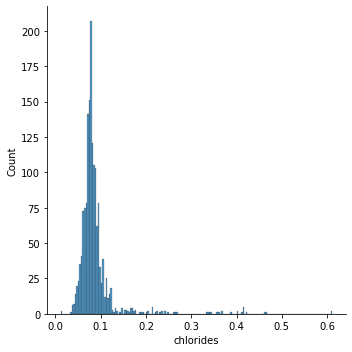

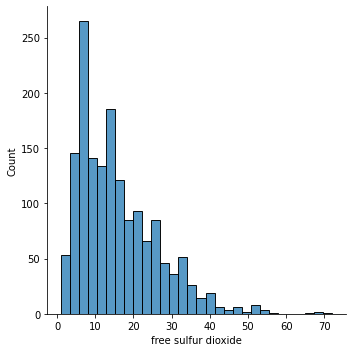

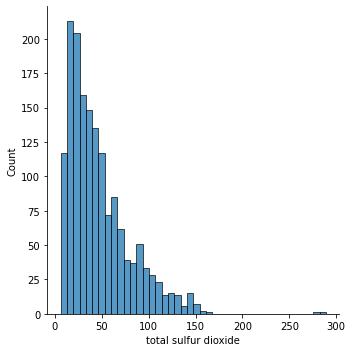

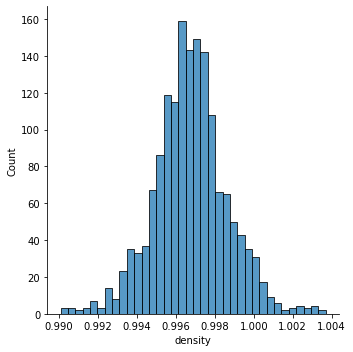

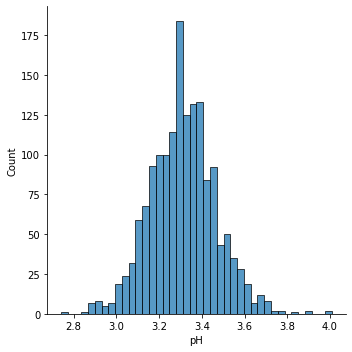

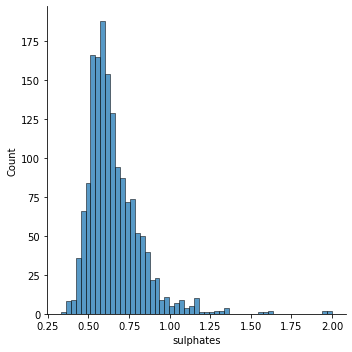

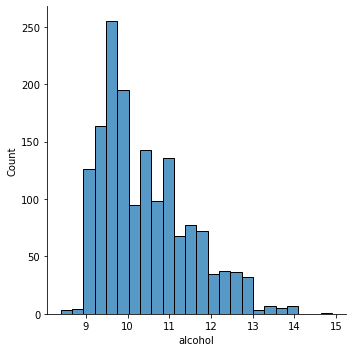

In [5]:
for i in df.drop('quality',axis=1).columns:
  sns.displot(df[[i]], x=i)

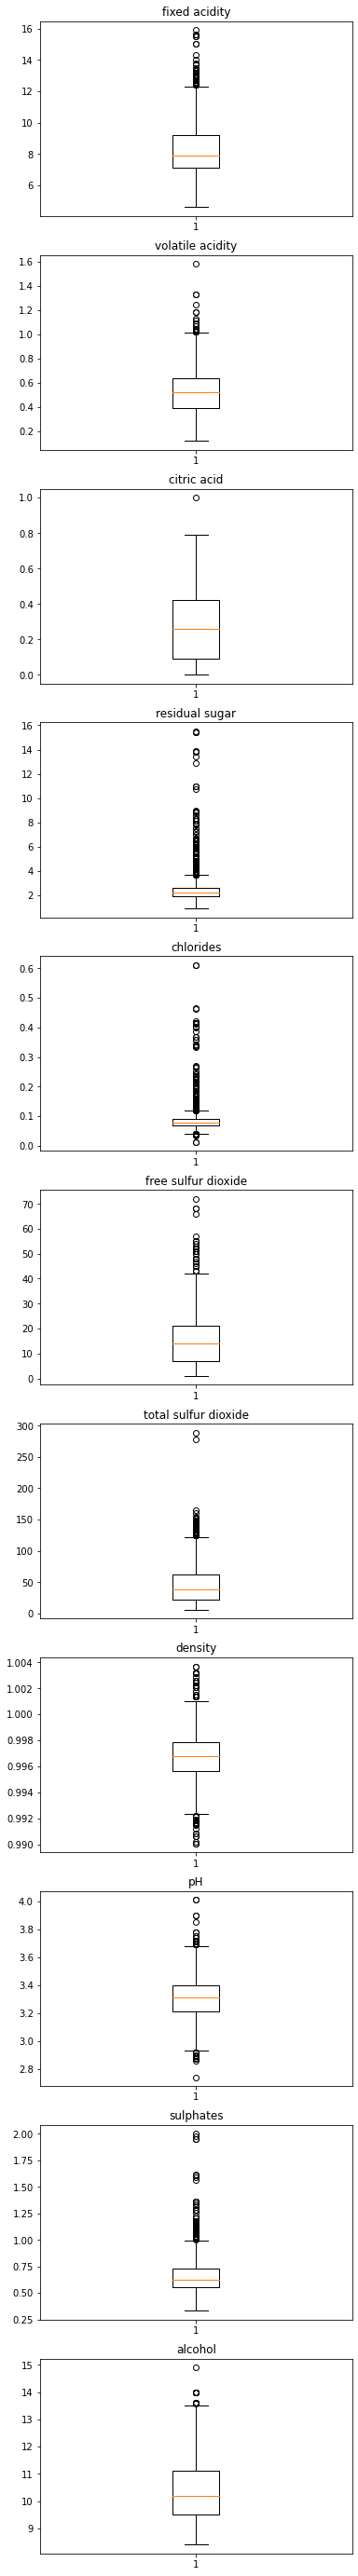

In [7]:
cols = df.drop('quality',axis=1).columns
figure, axes = plt.subplots(len(cols), figsize=(6,50))
for i in range(len(cols)):
  axes[i].boxplot(df[[cols[i]]])
  axes[i].set_title(cols[i])


In [8]:
df.isna().sum().sum()

0

# Логит-модель

In [9]:
X, y = df.drop('quality',axis=1), df['quality']
#X['intercept'] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
logit_model = Logit(y_train, X_train).fit(method='newton')
logit_model.params

Optimization terminated successfully.
         Current function value: 0.509417
         Iterations 6


fixed acidity           0.099908
volatile acidity       -3.480969
citric acid            -1.412619
residual sugar          0.001433
chlorides              -2.644580
free sulfur dioxide     0.026274
total sulfur dioxide   -0.017684
density                -9.410823
pH                     -0.019682
sulphates               2.427461
alcohol                 0.967545
dtype: float64

In [11]:
beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8, beta9, beta10, beta11 = sp.symbols('beta1 beta2 beta3 beta4 beta5 beta6 beta7 beta8 beta9 beta10 beta11')
y_star = sp.Symbol('\hat{y}')
beta = sp.Matrix([beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8, beta9, beta10, beta11])
sp.Eq(y_star,(sp.Matrix(np.round(logit_model.params.values,3)).T@beta)[0])

Eq(\hat{y}, 0.1*beta1 + 2.427*beta10 + 0.968*beta11 - 3.481*beta2 - 1.413*beta3 + 0.001*beta4 - 2.645*beta5 + 0.026*beta6 - 0.018*beta7 - 9.411*beta8 - 0.02*beta9)

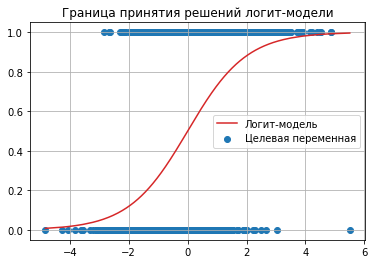

In [14]:
x_axis = X_train @ logit_model.params.values
plt.scatter(x_axis, y_train, color='tab:blue', label='Целевая переменная')
plt.plot(x_axis.sort_values().values, logit_model.predict(X_train).sort_values().values,color='tab:red', label='Логит-модель')
plt.legend()
plt.title('Граница принятия решений логит-модели')
plt.grid()

In [15]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                quality   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1108
Method:                           MLE   Df Model:                           10
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.2637
Time:                        17:33:58   Log-Likelihood:                -570.04
converged:                       True   LL-Null:                       -774.18
Covariance Type:            nonrobust   LLR p-value:                 1.623e-81
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0999      0.076      1.317      0.188      -0.049       0.249
volatile acidity        -3.4810      0.586     -5.940      0.000      -4.629      -2.332
citric acid             -1.4126      0.683     -2.069      0.039      -2.751      -0.074
residual sugar           0.0014      0.052      0.027      0.978      -0.101       0.104
chlorides               -2.6446      1.850     -1.429      0.153      -6.271       0.982
free sulfur dioxide      0.0263      0.010      2.579      0.010       0.006       0.046
total sulfur dioxide    -0.0177      0.004     -4.944      0.000      -0.025      -0.011
density                 -9.4108      2.856     -3.295      0.001     -15.008      -3.813
pH                      -0.0197      0.720     -0.027      0.978      -1.430       1.391
sulphates                2.4275      0.494      4.909      0.000       1.458       3.397
alcohol                  0.9675      0.092     10.509      0.000       0.787       1.148
========================================================================================
"""

Значимые признаки: volatile acidity, citric acid, free sulfur dioxide, total sulfur dioxide, density, sulphates, alcohol

Незначимые признаки: fixed acidity, residual sugar, chlorides, pH

In [16]:
XTb = X_train@logit_model.params
result = y_train
prediction1 = logit_model.predict(X_train)
prediction0 = 1 - prediction1
LnLikelihood = np.log(prediction1**result * prediction0**(1-result))
prediction_y = (logit_model.predict(X_train)>0.5).astype(np.int64)
cols = [XTb, result, prediction1, prediction0, LnLikelihood, prediction_y]
col_names = ['X^Tb', 'result', 'P(y=1)', 'P(y=0)', 'LnLHood', 'pred']

res_table = pd.DataFrame(dict(zip(col_names,cols)))
n = res_table.shape[0]
res_table.head(10)

,X^Tb,result,P(y=1),P(y=0),LnLHood,pred
925,2.762214,1,0.940599,0.059401,-0.061238,1
363,0.987608,0,0.728615,0.271385,-1.304218,1
906,0.098535,0,0.524614,0.475386,-0.743628,1
426,0.516476,1,0.626323,0.373677,-0.467889,1
1251,-0.545961,0,0.366802,0.633198,-0.456972,0
1274,0.821140,1,0.694478,0.305522,-0.364594,1
346,2.075317,1,0.888481,0.111519,-0.118242,1
1105,2.022868,0,0.883177,0.116823,-2.147097,1
1564,-0.469909,0,0.384638,0.615362,-0.485544,0
643,-1.311850,0,0.212178,0.787822,-0.238482,0


In [17]:
LnLikelihood_res = res_table['LnLHood'].sum()
print(f'Логарифм правдоподобия: {np.round(LnLikelihood_res,4)}')

p0_hat = res_table['result'].mean()
Ln_L0 = res_table['result'].sum()*np.log(p0_hat) + (n-res_table['result'].sum())*np.log(1-p0_hat)
print(f'Логарифм правдоподобия для тривиальной модели: {np.round(Ln_L0,4)}')

LR = 2 * (LnLikelihood_res - Ln_L0)
print(f'Критерий отношения правдоподобия: {np.round(LR,4)}')

alpha = 0.05
nu = 1
chi2_cr = sts.chi2.isf(alpha, nu)
print(f'Критическое значение: {np.round(chi2_cr,4)}')
if LR > chi2_cr:
  print('H0 отвергается => ур-е значимо')
else:
  print('H0 не отвергается => ур-е незначимо')

R2_pseudo = 1 - 1/(1+LR/n)
print(f'R2_pseudo: {np.round(R2_pseudo,3)}')

R2_McF = 1 - LnLikelihood_res/Ln_L0
print(f'R2_McFadden: {np.round(R2_McF,3)}')

wr1 = ((res_table['result']-res_table['pred'])**2).mean()
wr0 = p0_hat
R2_p = 1 - wr1/wr0
print(f'R2_p: {np.round(R2_p,3)}')

Логарифм правдоподобия: -570.0371
Логарифм правдоподобия для тривиальной модели: -774.1793
Критерий отношения правдоподобия: 408.2844
Критическое значение: 3.8415
H0 отвергается => ур-е значимо
R2_pseudo: 0.267
R2_McFadden: 0.264
R2_p: 0.537


In [18]:
p1 = logit_model.predict(X_train.mean(axis=0))[0]
pd.DataFrame(p1*(1-p1)*logit_model.params,columns=['Предельный эффект'])

,Предельный эффект
fixed acidity,0.024765
volatile acidity,-0.862854
citric acid,-0.350156
residual sugar,0.000355
chlorides,-0.655532
free sulfur dioxide,0.006513
total sulfur dioxide,-0.004384
density,-2.332731
pH,-0.004879
sulphates,0.601713


In [19]:
rng_features = []
for i in X_train.columns:
  feature = X_train[i]
  rng_features.append(np.linspace(feature.min(),feature.max(),10))

values = np.c_[rng_features].T
values_df = pd.DataFrame(values,columns=X_train.columns)
values_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000
1,5.855556,0.282222,0.111111,2.522222,0.078556,8.444444,37.444444,0.991583,2.881111,0.551111,9.122222
2,7.111111,0.444444,0.222222,4.144444,0.145111,15.888889,68.888889,0.993097,3.022222,0.732222,9.844444
3,8.366667,0.606667,0.333333,5.766667,0.211667,23.333333,100.333333,0.994610,3.163333,0.913333,10.566667
4,9.622222,0.768889,0.444444,7.388889,0.278222,30.777778,131.777778,0.996123,3.304444,1.094444,11.288889
5,10.877778,0.931111,0.555556,9.011111,0.344778,38.222222,163.222222,0.997637,3.445556,1.275556,12.011111
6,12.133333,1.093333,0.666667,10.633333,0.411333,45.666667,194.666667,0.999150,3.586667,1.456667,12.733333
7,13.388889,1.255556,0.777778,12.255556,0.477889,53.111111,226.111111,1.000663,3.727778,1.637778,13.455556
8,14.644444,1.417778,0.888889,13.877778,0.544444,60.555556,257.555556,1.002177,3.868889,1.818889,14.177778
9,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [20]:
fixed_features = X_train.sample(1,random_state=1)
marg_eff_df = values_df.copy()

for i in X_train.columns:
  marg_col = []
  for j in values_df[i]:
    vals = fixed_features.copy()
    vals[i] = j
    p1 = logit_model.predict(vals.values)[0]
    marg_col.append(p1*(1-p1)*logit_model.params[i])
  marg_eff_df[i] = marg_col
marg_eff_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.011132,-0.152172,-0.089002,0.000129,-0.207650,0.003243,-0.001220,-0.818612,-0.001752,0.385256,0.214387
1,0.010122,-0.249971,-0.101777,0.000129,-0.239624,0.002809,-0.001909,-0.828066,-0.001756,0.287215,0.241886
2,0.009175,-0.391975,-0.115972,0.000128,-0.274972,0.002413,-0.002794,-0.837599,-0.001760,0.204508,0.214823
3,0.008292,-0.571711,-0.131614,0.000128,-0.313507,0.002059,-0.003708,-0.847211,-0.001764,0.140916,0.154042
4,0.007474,-0.750925,-0.148680,0.000128,-0.354823,0.001746,-0.004326,-0.856903,-0.001768,0.094920,0.094532
5,0.006722,-0.860463,-0.167089,0.000128,-0.398259,0.001473,-0.004346,-0.866673,-0.001772,0.062967,0.052651
6,0.006032,-0.843850,-0.186686,0.000127,-0.442859,0.001237,-0.003758,-0.876522,-0.001776,0.041348,0.027767
7,0.005403,-0.710316,-0.207228,0.000127,-0.487371,0.001036,-0.002851,-0.886449,-0.001780,0.026971,0.014225
8,0.004831,-0.525362,-0.228372,0.000127,-0.530268,0.000864,-0.001958,-0.896454,-0.001784,0.017516,0.007180
9,0.004313,-0.352832,-0.249677,0.000127,-0.569822,0.000719,-0.001255,-0.906537,-0.001788,0.011344,0.003597


In [21]:
perfect_features = values_df[marg_eff_df == marg_eff_df.max(axis=0)].T.values.ravel()
perfect_features = perfect_features[~np.isnan(perfect_features)]
pd.DataFrame(np.round(perfect_features,3),index=X_train.columns, columns=['Опт. значения'])

,Опт. значения
fixed acidity,4.600
volatile acidity,0.120
citric acid,0.000
residual sugar,0.900
chlorides,0.012
free sulfur dioxide,1.000
total sulfur dioxide,6.000
density,0.990
pH,2.740
sulphates,0.370


In [22]:
logit_model.predict(perfect_features)[0]

0.57067393584762

### Оценка обобщающей способности

In [23]:
y_pred_log = (logit_model.predict(X_train)>0.5).astype(np.int64)
accuracy_score(y_pred_log,y_train), f1_score(y_pred_log,y_train)

(0.7569258266309205, 0.76592082616179)

In [24]:
y_pred_log = (logit_model.predict(X_test)>0.5).astype(np.int64)
accuracy_score(y_pred_log,y_test), f1_score(y_pred_log,y_test)

(0.7375, 0.7576923076923078)

# Пробит-модель

In [25]:
probit_model = Probit(y_train, X_train).fit(method='newton')
probit_model.params

Optimization terminated successfully.
         Current function value: 0.511100
         Iterations 6


fixed acidity           0.038887
volatile acidity       -1.968680
citric acid            -0.682810
residual sugar         -0.003067
chlorides              -1.752313
free sulfur dioxide     0.015418
total sulfur dioxide   -0.010810
density                -4.971615
pH                     -0.088047
sulphates               1.445253
alcohol                 0.550756
dtype: float64

In [26]:
beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8, beta9, beta10, beta11 = sp.symbols('beta1 beta2 beta3 beta4 beta5 beta6 beta7 beta8 beta9 beta10 beta11')
y_star = sp.Symbol('\hat{y}')
beta = sp.Matrix([beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8, beta9, beta10, beta11])
sp.Eq(y_star,(sp.Matrix(np.round(probit_model.params.values,3)).T@beta)[0])

Eq(\hat{y}, 0.039*beta1 + 1.445*beta10 + 0.551*beta11 - 1.969*beta2 - 0.683*beta3 - 0.003*beta4 - 1.752*beta5 + 0.015*beta6 - 0.011*beta7 - 4.972*beta8 - 0.088*beta9)

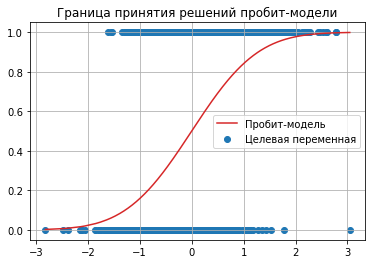

In [28]:
x_axis = X_train @ probit_model.params.values
plt.scatter(x_axis, y_train, color='tab:blue', label='Целевая переменная')
plt.plot(x_axis.sort_values().values, probit_model.predict(X_train).sort_values().values,color='tab:red', label='Пробит-модель')
plt.legend()
plt.title('Граница принятия решений пробит-модели')
plt.grid()

In [29]:
probit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                quality   No. Observations:                 1119
Model:                         Probit   Df Residuals:                     1108
Method:                           MLE   Df Model:                           10
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.2613
Time:                        17:34:35   Log-Likelihood:                -571.92
converged:                       True   LL-Null:                       -774.18
Covariance Type:            nonrobust   LLR p-value:                 1.029e-80
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0389      0.043      0.906      0.365      -0.045       0.123
volatile acidity        -1.9687      0.333     -5.906      0.000      -2.622      -1.315
citric acid             -0.6828      0.395     -1.730      0.084      -1.456       0.091
residual sugar          -0.0031      0.030     -0.102      0.918      -0.062       0.056
chlorides               -1.7523      1.065     -1.645      0.100      -3.840       0.336
free sulfur dioxide      0.0154      0.006      2.609      0.009       0.004       0.027
total sulfur dioxide    -0.0108      0.002     -5.446      0.000      -0.015      -0.007
density                 -4.9716      1.638     -3.036      0.002      -8.182      -1.762
pH                      -0.0880      0.416     -0.212      0.832      -0.904       0.727
sulphates                1.4453      0.282      5.129      0.000       0.893       1.998
alcohol                  0.5508      0.050     11.052      0.000       0.453       0.648
========================================================================================
"""

Значимые признаки: volatile acidity, free sulfur dioxide, total sulfur dioxide, density, sulphates, alcohol

Незначимые признаки: fixed acidity, citric acid, residual sugar, chlorides, pH

In [30]:
XTb = X_train@probit_model.params
result = y_train
prediction1 = probit_model.predict(X_train)
prediction0 = 1 - prediction1
LnLikelihood = np.log(prediction1**result * prediction0**(1-result))
prediction_y = (probit_model.predict(X_train)>0.5).astype(np.int64)
cols = [XTb, result, prediction1, prediction0, LnLikelihood, prediction_y]
col_names = ['X^Tb', 'result', 'P(y=1)', 'P(y=0)', 'LnLHood', 'pred']

res_table = pd.DataFrame(dict(zip(col_names,cols)))
n = res_table.shape[0]
res_table.head(10)

,X^Tb,result,P(y=1),P(y=0),LnLHood,pred
925,1.580584,1,0.943013,0.056987,-0.058675,1
363,0.596317,0,0.724518,0.275482,-1.289234,1
906,0.051485,0,0.520530,0.479470,-0.735075,1
426,0.297273,1,0.616871,0.383129,-0.483096,1
1251,-0.311646,0,0.377655,0.622345,-0.474260,0
1274,0.465911,1,0.679360,0.320640,-0.386604,1
346,1.194782,1,0.883914,0.116086,-0.123396,1
1105,1.187962,0,0.882576,0.117424,-2.141962,1
1564,-0.243139,0,0.403949,0.596051,-0.517429,0
643,-0.764864,0,0.222176,0.777824,-0.251255,0


In [31]:
LnLikelihood_res = res_table['LnLHood'].sum()
print(f'Логарифм правдоподобия: {np.round(LnLikelihood_res,4)}')

p0_hat = res_table['result'].mean()
Ln_L0 = res_table['result'].sum()*np.log(p0_hat) + (n-res_table['result'].sum())*np.log(1-p0_hat)
print(f'Логарифм правдоподобия для тривиальной модели: {np.round(Ln_L0,4)}')

LR = 2 * (LnLikelihood_res - Ln_L0)
print(f'Критерий отношения правдоподобия: {np.round(LR,4)}')

alpha = 0.05
nu = 1
chi2_cr = sts.chi2.isf(alpha, nu)
print(f'Критическое значение: {np.round(chi2_cr,4)}')
if LR > chi2_cr:
  print('H0 отвергается => ур-е значимо')
else:
  print('H0 не отвергается => ур-е незначимо')

R2_pseudo = 1 - 1/(1+LR/n)
print(f'R2_pseudo: {np.round(R2_pseudo,3)}')

R2_McF = 1 - LnLikelihood_res/Ln_L0
print(f'R2_McFadden: {np.round(R2_McF,3)}')

wr1 = ((res_table['result']-res_table['pred'])**2).mean()
wr0 = p0_hat
R2_p = 1 - wr1/wr0
print(f'R2_p: {np.round(R2_p,3)}')

Логарифм правдоподобия: -571.9207
Логарифм правдоподобия для тривиальной модели: -774.1793
Критерий отношения правдоподобия: 404.5172
Критическое значение: 3.8415
H0 отвергается => ур-е значимо
R2_pseudo: 0.266
R2_McFadden: 0.261
R2_p: 0.541


In [32]:
p1 = probit_model.predict(X_train.mean(axis=0))[0]
pd.DataFrame(p1*(1-p1)*probit_model.params,columns=['Предельный эффект'])

,Предельный эффект
fixed acidity,0.009651
volatile acidity,-0.488565
citric acid,-0.169452
residual sugar,-0.000761
chlorides,-0.434870
free sulfur dioxide,0.003826
total sulfur dioxide,-0.002683
density,-1.233801
pH,-0.021850
sulphates,0.358667


In [33]:
rng_features = []
for i in X_train.columns:
  feature = X_train[i]
  rng_features.append(np.linspace(feature.min(),feature.max(),10))

values = np.c_[rng_features].T
values_df = pd.DataFrame(values,columns=X_train.columns)
values_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000
1,5.855556,0.282222,0.111111,2.522222,0.078556,8.444444,37.444444,0.991583,2.881111,0.551111,9.122222
2,7.111111,0.444444,0.222222,4.144444,0.145111,15.888889,68.888889,0.993097,3.022222,0.732222,9.844444
3,8.366667,0.606667,0.333333,5.766667,0.211667,23.333333,100.333333,0.994610,3.163333,0.913333,10.566667
4,9.622222,0.768889,0.444444,7.388889,0.278222,30.777778,131.777778,0.996123,3.304444,1.094444,11.288889
5,10.877778,0.931111,0.555556,9.011111,0.344778,38.222222,163.222222,0.997637,3.445556,1.275556,12.011111
6,12.133333,1.093333,0.666667,10.633333,0.411333,45.666667,194.666667,0.999150,3.586667,1.456667,12.733333
7,13.388889,1.255556,0.777778,12.255556,0.477889,53.111111,226.111111,1.000663,3.727778,1.637778,13.455556
8,14.644444,1.417778,0.888889,13.877778,0.544444,60.555556,257.555556,1.002177,3.868889,1.818889,14.177778
9,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [34]:
fixed_features = X_train.sample(1,random_state=7)
marg_eff_df = values_df.copy()

for i in X_train.columns:
  marg_col = []
  for j in values_df[i]:
    vals = fixed_features.copy()
    vals[i] = j
    p1 = probit_model.predict(vals.values)[0]
    marg_col.append(p1*(1-p1)*probit_model.params[i])
  marg_eff_df[i] = marg_col
marg_eff_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.008741,-0.424023,-0.165118,-0.000762,-0.438078,0.003511,-0.002558,-1.239306,-0.021919,0.317233,0.099973
1,0.008952,-0.483683,-0.168185,-0.000762,-0.434365,0.003682,-0.002699,-1.238461,-0.021889,0.353021,0.129326
2,0.009140,-0.484794,-0.170061,-0.000761,-0.423299,0.003797,-0.002459,-1.237527,-0.021854,0.360164,0.137075
3,0.009304,-0.426934,-0.170702,-0.000761,-0.405468,0.003851,-0.001938,-1.236505,-0.021816,0.336799,0.118851
4,0.009443,-0.331093,-0.170096,-0.000760,-0.381793,0.003841,-0.001327,-1.235394,-0.021773,0.288911,0.084628
5,0.009555,-0.227071,-0.168254,-0.000760,-0.353446,0.003767,-0.000795,-1.234196,-0.021726,0.227751,0.049913
6,0.009639,-0.138491,-0.165220,-0.000759,-0.321750,0.003633,-0.000420,-1.232910,-0.021674,0.165421,0.024659
7,0.009694,-0.075571,-0.161061,-0.000759,-0.288076,0.003446,-0.000197,-1.231537,-0.021619,0.111050,0.010320
8,0.009720,-0.037103,-0.155870,-0.000758,-0.253742,0.003215,-0.000082,-1.230076,-0.021559,0.069136,0.003691
9,0.009716,-0.016463,-0.149759,-0.000757,-0.219933,0.002951,-0.000031,-1.228529,-0.021496,0.040044,0.001135


In [35]:
perfect_features = values_df[marg_eff_df == marg_eff_df.max(axis=0)].T.values.ravel()
perfect_features = perfect_features[~np.isnan(perfect_features)]
pd.DataFrame(np.round(perfect_features,3),index=X_train.columns, columns=['Опт. значения'])

,Опт. значения
fixed acidity,14.644
volatile acidity,1.580
citric acid,1.000
residual sugar,15.500
chlorides,0.611
free sulfur dioxide,23.333
total sulfur dioxide,289.000
density,1.004
pH,4.010
sulphates,0.732


In [36]:
logit_model.predict(perfect_features)[0]

5.75474261008224e-05

### Обобщаяющая способность

In [37]:
y_pred_log = (probit_model.predict(X_train)>0.5).astype(np.int64)
accuracy_score(y_pred_log,y_train), f1_score(y_pred_log,y_train)

(0.7587131367292225, 0.768041237113402)

In [38]:
y_pred_prob = (probit_model.predict(X_test)>0.5).astype(np.int64)
accuracy_score(y_pred_prob,y_test), f1_score(y_pred_prob,y_test)

(0.7375, 0.7567567567567567)